In [1]:
from __future__ import print_function, division
import pylab as pl
import numpy as np
import pandas as pd
import os 
from datetime import datetime, date
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

Idea: Age groups (20, 40) are more likely to take long trips than other age groups.

Null Hypothesis: The proportion of trips taken by age groups(20, 40) that are more than 30 minutes in duration is the same of lower than the proportion of trips taken by other age groups that are more than 30 minutes in duration.

Alternative Hypothesis: The proportion of trips taken by age groups(20, 40) that are more than 30 minutes in duration is more than proportion of trips taken by other age groups that are more than 30 minutes in duration

## Confidence level ##

${Significance-level } , {α = 0.05 }$

Null Hypothesis Formula 

$H_0$ : $\frac{AgeGroup(20,40){\mathrm{30minDuration}}}{AgeGroup(20,40){\mathrm{AllDuration}}} <= \frac{AllAgeGroupExcept(20,40){\mathrm{30minDuration}}}{AllAgeGroupExcept(20,40){\mathrm{AllDuration}}}$

Alternate Hypothesis Formula
    
$H_1$ : $\frac{AgeGroup(20,40){\mathrm{30minDuration}}}{AgeGroup(20,40){\mathrm{AllDuration}}} > \frac{AllAgeGroupExcept(20,40){\mathrm{30minDuration}}}{AllAgeGroupExcept(20,40){\mathrm{AllDuration}}}$


In [2]:
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

In [3]:
os.chdir(os.getenv("PUIDATA"))

In [4]:
os.getcwd()

'/home/habtemariam/PUIdata'

In [5]:
tripdata = pd.read_csv("201601-citibike-tripdata.csv")

In [6]:
tripdata.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1


In [7]:
tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509478 entries, 0 to 509477
Data columns (total 15 columns):
tripduration               509478 non-null int64
starttime                  509478 non-null object
stoptime                   509478 non-null object
start station id           509478 non-null int64
start station name         509478 non-null object
start station latitude     509478 non-null float64
start station longitude    509478 non-null float64
end station id             509478 non-null int64
end station name           509478 non-null object
end station latitude       509478 non-null float64
end station longitude      509478 non-null float64
bikeid                     509478 non-null int64
usertype                   509478 non-null object
birth year                 484933 non-null float64
gender                     509478 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 58.3+ MB


In [8]:
tmp = tripdata['birth year'].astype(str)

In [9]:
tmp = list(tmp)

In [10]:
tmp_ = [tmp[i].split('-')[0] for i in range(len(tmp))]

In [11]:
tmp_

['1958.0',
 '1969.0',
 '1982.0',
 '1961.0',
 '1952.0',
 '1984.0',
 '1963.0',
 '1996.0',
 '1963.0',
 '1971.0',
 '1970.0',
 '1988.0',
 '1964.0',
 '1976.0',
 '1989.0',
 '1970.0',
 '1993.0',
 '1982.0',
 '1972.0',
 'nan',
 'nan',
 '1982.0',
 'nan',
 '1988.0',
 '1982.0',
 '1963.0',
 'nan',
 '1970.0',
 'nan',
 '1976.0',
 'nan',
 'nan',
 'nan',
 '1951.0',
 '1966.0',
 '1971.0',
 '1960.0',
 '1989.0',
 '1954.0',
 '1962.0',
 '1977.0',
 '1972.0',
 '1974.0',
 '1990.0',
 '1990.0',
 '1982.0',
 '1982.0',
 '1981.0',
 '1988.0',
 '1983.0',
 '1988.0',
 '1973.0',
 'nan',
 'nan',
 '1958.0',
 '1985.0',
 '1981.0',
 '1986.0',
 '1956.0',
 '1994.0',
 '1993.0',
 '1965.0',
 '1988.0',
 '1982.0',
 '1994.0',
 '1994.0',
 '1986.0',
 '1993.0',
 '1975.0',
 '1982.0',
 '1959.0',
 '1987.0',
 '1989.0',
 'nan',
 'nan',
 '1974.0',
 'nan',
 '1996.0',
 '1966.0',
 '1960.0',
 'nan',
 '1986.0',
 '1985.0',
 '1962.0',
 '1977.0',
 '1985.0',
 '1978.0',
 '1992.0',
 '1949.0',
 '1961.0',
 '1986.0',
 'nan',
 '1950.0',
 'nan',
 'nan',
 '1982

In [12]:
tmp__ = pd.Series(data=tmp_)

In [13]:
tmp__

0         1958.0
1         1969.0
2         1982.0
3         1961.0
4         1952.0
5         1984.0
6         1963.0
7         1996.0
8         1963.0
9         1971.0
10        1970.0
11        1988.0
12        1964.0
13        1976.0
14        1989.0
15        1970.0
16        1993.0
17        1982.0
18        1972.0
19           nan
20           nan
21        1982.0
22           nan
23        1988.0
24        1982.0
25        1963.0
26           nan
27        1970.0
28           nan
29        1976.0
           ...  
509448    1988.0
509449    1985.0
509450    1962.0
509451    1966.0
509452    1975.0
509453    1950.0
509454    1992.0
509455    1992.0
509456    1964.0
509457    1991.0
509458    1994.0
509459    1994.0
509460    1962.0
509461    1955.0
509462    1962.0
509463    1963.0
509464    1962.0
509465    1983.0
509466    1976.0
509467    1982.0
509468    1989.0
509469    1956.0
509470    1988.0
509471    1975.0
509472    1983.0
509473    1982.0
509474    1978.0
509475    1990

In [14]:
tmp__.fillna(0.0, inplace=True)

In [15]:
tmp__ = tmp__.replace(to_replace="nan", value=0.0, regex=True).astype(float)

In [16]:
tmp__ = tmp__.astype(float)

In [17]:
tmp__ = tmp__.astype(int)

In [18]:
year__ = date.today().year

In [19]:
year__

2018

In [20]:
tripdata['age'] = year__ - tmp__

In [21]:
type(tripdata['age'])

pandas.core.series.Series

In [22]:
tripdata['birth year'] = tmp__.astype(int)

In [23]:
tripdata.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958,1,60
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969,1,49
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982,2,36
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961,2,57
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952,1,66


In [24]:
tripdata.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'age'],
      dtype='object')

In [25]:
tripdata.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'], axis=1, inplace=True)

In [26]:
tripdata.head()

,tripduration,age
0,923,60
1,379,49
2,589,36
3,889,57
4,1480,66


In [27]:
tripdata[tripdata.tripduration/60 > 30]

,tripduration,age
6,2321,55
25,2038,55
26,2023,2018
48,2595,30
50,2606,30
70,2494,59
85,1899,33
86,2165,40
96,2446,68
97,2426,2018


In [28]:
tripdata[~(tripdata.tripduration/60 > 30)]

,tripduration,age
0,923,60
1,379,49
2,589,36
3,889,57
4,1480,66
5,332,34
7,694,22
8,1376,55
9,615,47
10,1770,48


In [29]:
tripdata[(tripdata.age > 20) & (tripdata.age < 40)]

,tripduration,age
2,589,36
5,332,34
7,694,22
11,525,30
14,539,29
16,479,25
17,888,36
21,719,36
23,280,30
24,937,36


In [30]:
mask = ((tripdata.age < 20)) | ((tripdata.age > 40) & (tripdata.age != 2018))
#tripdata[mask].min()
tripdata[mask]

,tripduration,age
0,923,60
1,379,49
3,889,57
4,1480,66
6,2321,55
8,1376,55
9,615,47
10,1770,48
12,667,54
13,240,42


In [31]:
#np.where((tripdata.age < 20) | ((tripdata.age > 40) & (tripdata.age != 2018)), 1, 0)
mask_ = ((tripdata.age > 20) & (tripdata.age < 40))
#tripdata['age_group'] = np.where((mask), 0, 1)
tripdata['age_group'] = np.where(mask_, 1, 0)

In [32]:
tripdata[tripdata.age == 18]

,tripduration,age,age_group
427725,455,18,0


In [33]:
tripdata.head(100)

,tripduration,age,age_group
0,923,60,0
1,379,49,0
2,589,36,1
3,889,57,0
4,1480,66,0
5,332,34,1
6,2321,55,0
7,694,22,1
8,1376,55,0
9,615,47,0


In [34]:
tripdata['longer_30'] = np.where(tripdata['tripduration']>1800, 1, 0)

In [35]:
tripdata.head(10)

,tripduration,age,age_group,longer_30
0,923,60,0,0
1,379,49,0,0
2,589,36,1,0
3,889,57,0,0
4,1480,66,0,0
5,332,34,1,0
6,2321,55,0,1
7,694,22,1,0
8,1376,55,0,0
9,615,47,0,0


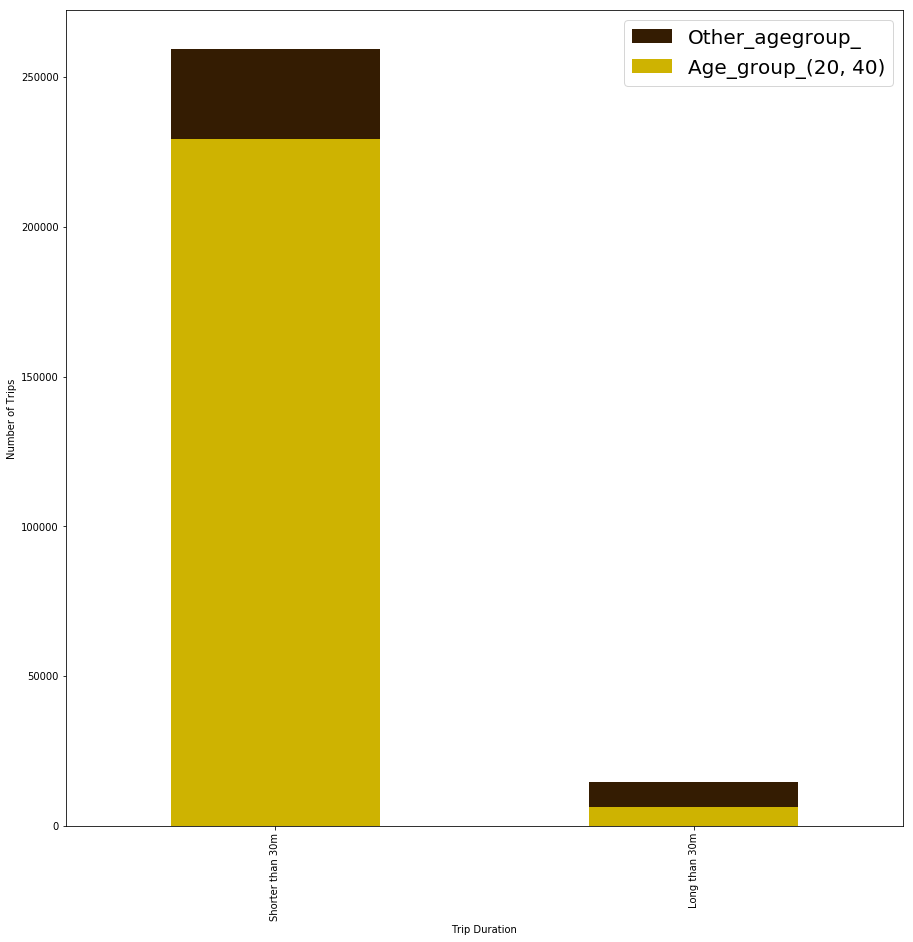

In [36]:
fig = pl.figure(figsize=(15,15))
plot_data = pd.pivot_table(tripdata[tripdata.age_group >= 0], index='longer_30', columns='age_group', aggfunc='count')
plot_data.columns = ['Age_group_(20,40)','Other_agegroup_', 'age', 'tripduration']
plot_data['Age_group_(20,40)'].plot(kind="bar", color='xkcd:dark brown', label='Age_group_(20,40)')
plot_data['Other_agegroup_'].plot(kind="bar", color='xkcd:mustard', label='Other_agegroup_') 
pl.xlabel("Trip Duration")
pl.ylabel("Number of Trips")
pl.xticks(np.arange(2), ('Shorter than 30m','Long than 30m'))
pl.legend(['Other_agegroup_', 'Age_group_(20, 40)'], fontsize=20)
#plot_data.head()

In [37]:
#tripdata.age_group.values
(tripdata.age_group!=0).sum()
(tripdata.age_group==0).sum()

273939

In [38]:
(tripdata.longer_30==0).sum()
#(tripdata.longer_30!=0).sum()

488581

In [39]:
((tripdata.age_group == 1) & (tripdata.longer_30 == 1)).sum()

6288

In [40]:
((tripdata.age_group == 1) & (tripdata.longer_30 == 0)).sum()

229251

In [41]:
((tripdata.age_group != 1) & (tripdata.longer_30 == 1)).sum()

14609

In [42]:
((tripdata.age_group != 1) & (tripdata.longer_30 == 0)).sum()

259330

In [43]:
(tripdata.age_group != 1).sum()

273939

In [47]:
age_trip_tab = pd.crosstab(tripdata.age_group, tripdata.longer_30, margins=True)
age_trip_tab
age_trip_tab.columns = ["Trips less than half hour","Trips more than half hour", "Total"]

age_trip_tab.index = ["Age Group(20, 40)","Outside Age Group", "Total"]

observed = age_trip_tab.iloc[0:2,0:2]   # totals for later use
age_trip_tab

,Trips less than half hour,Trips more than half hour,Total
"Age Group(20, 40)",259330,14609,273939
Outside Age Group,229251,6288,235539
Total,488581,20897,509478


In [49]:
expected =  np.outer(age_trip_tab["Total"][0:2],
                     age_trip_tab.loc["Total"][0:2]) / 509478
observed

,Trips less than half hour,Trips more than half hour
"Age Group(20, 40)",259330,14609
Outside Age Group,229251,6288


In [50]:
expected = pd.DataFrame(expected)

expected.columns = ["Trips less than half hour","Trips more than half hour"]
expected.index = ["Age Group(20, 40)","Outside Age Group"]

expected

,Trips less than half hour,Trips more than half hour
"Age Group(20, 40)",262702.983365,11236.016635
Outside Age Group,225878.016635,9660.983365


In [51]:
#age_trip_obs  = np.array([[259330, 14609], [229251, 6288]])
#age_trip_exp  = np.array([[262702.983365, 11236.016635], [225878.016635, 9660.983365]])

#stats.chisquare(f_obs= observed,   # Array of observed counts
 #               f_exp= expected) 

In [52]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

In [53]:
print(chi_squared_stat)

2283.849569711191


In [54]:
crit = chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 1)   # *

print("Critical value")
print(crit)

p_value = 1 - chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=1)
print("P value")
print(p_value)

Critical value
3.841458820694124
P value
0.0


In [55]:
chi2_contingency(observed= observed)

(2283.172519145808, 0.0, 1, array([[262702.98336533,  11236.01663467],
        [225878.01663467,   9660.98336533]]))

As expected, given the high p-value, the test result does not detect a significant relationship between the age groups and trip duration categories.

The p-value is found by P(χ2>2283.849569711191) with degrees of freedom = (2-1)(2-1) = 1

Given this p-value of 0.000 is less than alpha of 0.05, we reject the null hypothesis that bicycle riders of ages through 20 to 40 years of age are more likely to take long trips than other age groups, excluding this same age group.